# Evaluation Techniques for classification models

### Import dependencies

In [249]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

### Load the Dataset
Each feature offers unique insights and data points that help us understand and forecast different weather conditions with greater accuracy. By analyzing and leveraging these features, we aim to build a robust predictive model to classify and anticipate weather types effectively.

In [252]:
df = load_iris()
x = df.data
y = df.target

## Spliting the X and Y
To prepare your dataset for machine learning, start by separating your data into features (X) and the target variable (Y). Use the feature columns as X and the target column as Y. Next, split the data into training and testing sets using scikit-learn’s `train_test_split`, which helps ensure that the model can be trained on one portion of the data and evaluated on another. This step is crucial for assessing the model’s performance on unseen data. Finally, verify that the split is appropriately sized and that the distribution of the target variable is preserved, ensuring a robust and fair evaluation of your model.

# spliting into training and testing datasets
To split your dataset into training and testing sets, first, divide your features (X) and target variable (Y). Use scikit-learn's `train_test_split` function to partition the data into training and testing datasets. This approach helps in training the model on one portion of the data while reserving another portion for evaluation, ensuring that you can assess the model's performance on unseen data. It’s essential to check that the split maintains the distribution of the target variable and that the sizes of the datasets are suitable for effective model training and testing. This process ensures a reliable and unbiased evaluation of your machine learning model.

In [255]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Classification using KNeighborsClassifier
To perform classification using the K-Nearest Neighbors (KNN) algorithm with `KNeighborsClassifier`, start by initializing the classifier from scikit-learn. The KNN algorithm classifies data based on the majority class among its 'k' nearest neighbors in the feature space. Fit the model on your training dataset, which includes the features (X_train) and target variable (Y_train). After training, assess the model's performance using the testing dataset (X_test and Y_test) to evaluate metrics such as accuracy, precision, recall, and F1 score. KNN is a simple yet effective algorithm that makes predictions by comparing the similarity of data points, making it suitable for various classification tasks.

In [258]:
# Initialize and fit the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In classification models, `predict` and `predict_proba` are methods used to obtain different types of predictions from a trained model. Here's a detailed explanation of each:

### `predict`

- **Purpose**: This method is used to get the class labels for the input samples.
- **Output**: It returns the predicted class labels (e.g., 0, 1, 2 for a three-class problem).
- **Usage**: After fitting the model, `predict` is commonly used to evaluate the model's performance by comparing the predicted labels to the true labels.

**Example**:
```python
y_pred = model.predict(X_test)
```
- `y_pred` will be an array of predicted class labels for each sample in `X_test`.

### `predict_proba`

- **Purpose**: This method returns the class probabilities for the input samples.
- **Output**: It returns a 2D array where each row corresponds to a sample and each column corresponds to a class. Each entry in the array is the probability of the corresponding class label for that sample.
- **Usage**: This method is useful when you need to understand the confidence of the model's predictions or when evaluating metrics that require probabilities, such as ROC curves and AUC.

**Example**:
```python
y_scores = model.predict_proba(X_test)
```
- `y_scores` will be a 2D array where each row contains the predicted probabilities for each class. For example, if you have three classes, each row will have three values, representing the probability of each class for that sample.

### Use Cases and Differences

1. **Class Label Predictions**:
   - Use `predict` when you need the final class labels to make decisions or evaluate metrics like accuracy, precision, recall, and F1 score.

2. **Probabilistic Predictions**:
   - Use `predict_proba` when you need the probabilities associated with each class to make more informed decisions. For example:
     - **Thresholding**: Adjust the threshold for classification decisions.
     - **Evaluation**: Compute metrics like ROC AUC that require probability estimates.

In [261]:
# Make predictions
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

The `confusion_matrix` function from `scikit-learn` computes the confusion matrix for a classification problem. A confusion matrix is a useful tool for evaluating the performance of a classification model. It provides a summary of the prediction results by comparing the predicted labels against the true labels.

### What is a Confusion Matrix?

For a binary classification problem, a confusion matrix looks like this:

|                | Predicted Positive | Predicted Negative |
|----------------|---------------------|---------------------|
| Actual Positive| True Positive (TP)  | False Negative (FN) |
| Actual Negative| False Positive (FP) | True Negative (TN)  |

In a multi-class classification problem, the confusion matrix will be larger, with each cell representing the count of samples corresponding to the actual and predicted class labels.

### How to Interpret the Confusion Matrix:

- **True Positive (TP)**: The number of instances correctly predicted as the positive class.
- **True Negative (TN)**: The number of instances correctly predicted as the negative class.
- **False Positive (FP)**: The number of instances incorrectly predicted as the positive class.
- **False Negative (FN)**: The number of instances incorrectly predicted as the negative class.
```
Confusion Matrix:
[[2 1]
 [2 5]]
```

For a binary classification problem:

- **`cm[0, 0]` (2)**: True Negatives (TN) - Number of instances correctly predicted as class 0.
- **`cm[0, 1]` (1)**: False Positives (FP) - Number of instances incorrectly predicted as class 1 when they are class 0.
- **`cm[1, 0]` (2)**: False Negatives (FN) - Number of instances incorrectly predicted as class 0 when they are class 1.
- **`cm[1, 1]` (5)**: True Positives (TP) - Number of instances correctly predicted as class 1.

### Multi-Class Classification

For a multi-class classification problem, the confusion matrix will be a square matrix where each cell `[i, j]` represents the number of samples with true class `i` that were predicted as class `j`. Each row of the matrix represents the instances of the true class, while each column represents the instances of the predicted class.

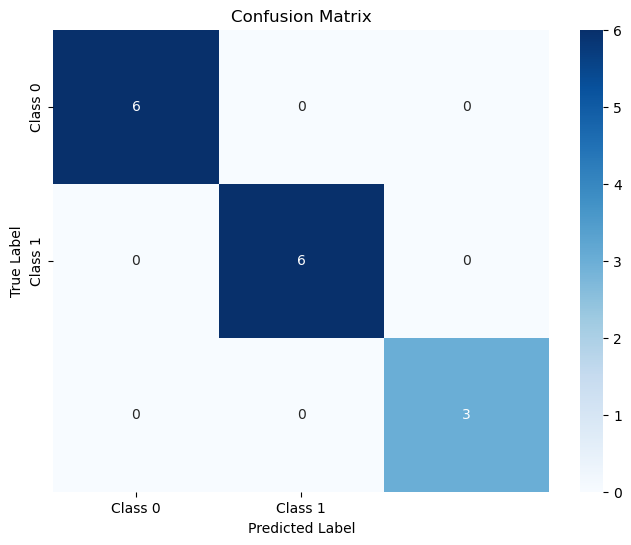

In [264]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The `accuracy_score` function from `scikit-learn` computes the accuracy of a classification model, which is a measure of how well the model's predictions match the true labels. Accuracy is a commonly used metric for evaluating classification models.

### What is Accuracy?

Accuracy is defined as the ratio of the number of correct predictions to the total number of predictions. It gives an overall sense of how often the model is correct.

### Formula

The formula for accuracy is:

\[ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \]

For a binary classification problem, it can be expressed as:

\[ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} \]

Where:
- **TP** = True Positives
- **TN** = True Negatives
- **FP** = False Positives
- **FN** = False Negatives

For the example:

```python
Accuracy: 0.8
```

This means the model correctly predicted the class for 80% of the samples.

### Key Points

- **Simple and Intuitive**: Accuracy is easy to understand and compute.
- **Limitations**: It can be misleading for imbalanced datasets where one class is much more frequent than others. For example, if 95% of the samples belong to one class, a model that always predicts that class will have high accuracy but may not be useful.

In such cases, additional metrics like precision, recall, F1 score, and others might provide a more comprehensive evaluation of the model's performance.

In [266]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 1.0


The `precision_score` function from `scikit-learn` computes the precision of a classification model. Precision is a measure of the accuracy of the positive predictions. It tells you how many of the predicted positive instances are actually positive.

### What is Precision?

Precision is defined as the ratio of true positive predictions to the sum of true positive and false positive predictions. It is especially important in scenarios where the cost of false positives is high.

### Formula

The formula for precision is:

$[ \text{Precision} = \frac{TP}{TP + FP} $]

Where:
- **TP** = True Positives: The number of instances correctly predicted as the positive class.
- **FP** = False Positives: The number of instances incorrectly predicted as the positive class.

### Using `precision_score`

The `precision_score` function allows you to calculate precision with different averaging strategies for multi-class classification problems:

- **`average='binary'`**: (default) For binary classification. Precision is computed for the positive class.
- **`average='micro'`**: Calculates precision globally by counting the total true positives, false negatives, and false positives.
- **`average='macro'`**: Calculates precision for each class and then takes the average. It treats all classes equally regardless of their size.
- **`average='weighted'`**: Calculates precision for each class, and then averages them weighted by the number of true instances for each class. This accounts for class imbalance.

### Output

```python
Precision (weighted): 0.8
```

This means the model's precision, averaged across all classes and weighted by the number of true instances, is 80%.

### Key Points

- **Precision vs. Recall**: Precision focuses on the correctness of positive predictions, whereas recall focuses on how well the model identifies all positive instances.
- **Class Imbalance**: The `average='weighted'` option helps to account for class imbalance by giving more importance to classes with more instances.
- **Application**: Precision is useful in scenarios where false positives are particularly costly, such as in medical diagnoses or fraud detection.

In summary, precision provides insight into the reliability of the model's positive predictions and is especially valuable when dealing with imbalanced datasets.

In [270]:
# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 1.0


The `recall_score` function from `scikit-learn` calculates the recall of a classification model. Recall, also known as sensitivity or true positive rate, measures the ability of the model to identify all relevant positive instances. It is crucial when the cost of missing positive instances is high.

### What is Recall?

Recall is defined as the ratio of true positive predictions to the sum of true positive and false negative predictions. It shows how well the model detects positive instances.

### Formula

The formula for recall is:

$[ \text{Recall} = \frac{TP}{TP + FN} $]

Where:
- **TP** = True Positives: The number of instances correctly predicted as the positive class.
- **FN** = False Negatives: The number of instances incorrectly predicted as the negative class.

### Using `recall_score`

The `recall_score` function, similar to `precision_score`, allows for different averaging strategies in multi-class classification problems:

- **`average='binary'`**: (default) For binary classification. Recall is computed for the positive class.
- **`average='micro'`**: Calculates recall globally by counting the total true positives and false negatives.
- **`average='macro'`**: Calculates recall for each class and then takes the average. All classes are treated equally.
- **`average='weighted'`**: Calculates recall for each class, and then averages them weighted by the number of true instances for each class. This accounts for class imbalance.

### Output

```python
Recall (weighted): 0.8
```

This means the model's recall, averaged across all classes and weighted by the number of true instances, is 80%.

### Key Points

- **Recall vs. Precision**: Recall focuses on capturing all relevant positive instances, while precision focuses on the correctness of positive predictions.
- **Class Imbalance**: The `average='weighted'` option helps to account for class imbalance by giving more weight to classes with more instances.
- **Application**: Recall is important in scenarios where missing positive instances can have severe consequences, such as in disease detection or fraud detection.

In summary, recall provides insight into the model's ability to find all positive instances and is especially useful in situations where the cost of false negatives is high.

In [273]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 1.0


The `f1_score` function from `scikit-learn` computes the F1 score of a classification model. The F1 score is a metric that combines precision and recall into a single value, providing a balance between them. It is particularly useful when you need a single metric to evaluate the performance of a model, especially in cases where there is an uneven class distribution.

### What is the F1 Score?

The F1 score is the harmonic mean of precision and recall. It is defined as:

$[ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $]

Where:
- **Precision** is the ratio of true positive predictions to the sum of true positives and false positives.
- **Recall** is the ratio of true positive predictions to the sum of true positives and false negatives.

### Why Use the F1 Score?

- **Balance Between Precision and Recall**: The F1 score provides a balance between precision and recall, making it a useful metric when both false positives and false negatives are important.
- **Class Imbalance**: It is particularly useful in scenarios where the classes are imbalanced, as it takes both precision and recall into account.

### Using `f1_score`

The `f1_score` function allows for different averaging strategies in multi-class classification problems:

- **`average='binary'`**: (default) For binary classification. The F1 score is computed for the positive class.
- **`average='micro'`**: Calculates F1 score globally by counting the total true positives, false positives, and false negatives.
- **`average='macro'`**: Calculates F1 score for each class and then takes the average. It treats all classes equally regardless of their size.
- **`average='weighted'`**: Calculates F1 score for each class and then averages them weighted by the number of true instances for each class. This accounts for class imbalance.

### Output

```python
F1 Score (weighted): 0.8
```

This means the model's F1 score, averaged across all classes and weighted by the number of true instances, is 80%.

### Key Points

- **F1 Score vs. Precision and Recall**: While precision and recall provide individual insights, the F1 score combines both, providing a more comprehensive evaluation of model performance.
- **Class Imbalance**: The `average='weighted'` option helps to account for class imbalance by giving more importance to classes with more instances.
- **Application**: The F1 score is useful in scenarios where you need a balance between precision and recall and when dealing with imbalanced datasets.

In summary, the F1 score offers a balanced view of the model's performance, making it an important metric when both precision and recall are critical.

In [276]:
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 1.0


The ROC Curve and AUC (Area Under the Curve) are important metrics for evaluating the performance of classification models, particularly in binary classification tasks. They provide insight into how well a model distinguishes between the positive and negative classes.

### ROC Curve

The ROC (Receiver Operating Characteristic) Curve is a graphical representation of a classifier's performance across different classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

#### Key Components

- **True Positive Rate (TPR)**: Also known as Recall or Sensitivity, it measures the proportion of actual positives that are correctly identified.
  
  $[ \text{TPR} = \frac{TP}{TP + FN} $]

- **False Positive Rate (FPR)**: It measures the proportion of actual negatives that are incorrectly classified as positive.
  
  $[ \text{FPR} = \frac{FP}{FP + TN} $]

### Steps to Plot the ROC Curve

1. **Compute Prediction Scores**: Get the probability scores or decision function values for each instance.
2. **Compute TPR and FPR**: For various threshold values, calculate the True Positive Rate and False Positive Rate.
3. **Plot**: Plot the True Positive Rate (TPR) on the y-axis and False Positive Rate (FPR) on the x-axis.

### AUC (Area Under the Curve)

The AUC represents the area under the ROC Curve. It provides a single value that summarizes the performance of the classifier:

- **AUC = 1**: Perfect model.
- **AUC = 0.5**: No discrimination ability (random guesses).
- **AUC < 0.5**: Worse than random guessing.

### Key Points

- **ROC Curve**: Useful for visualizing the trade-offs between the True Positive Rate and False Positive Rate at different thresholds.
- **AUC**: Provides a single metric to compare classifiers, where a higher AUC indicates a better model.

### Application

- **Binary Classification**: Primarily used for binary classification problems to evaluate the trade-offs between sensitivity and specificity.
- **Model Comparison**: AUC is useful for comparing multiple models; a model with a higher AUC is generally preferred.

### Summary

The ROC Curve and AUC are valuable tools for assessing the performance of classification models, especially when dealing with imbalanced datasets. They help you understand how well your model distinguishes between classes and how well it performs across different decision thresholds.

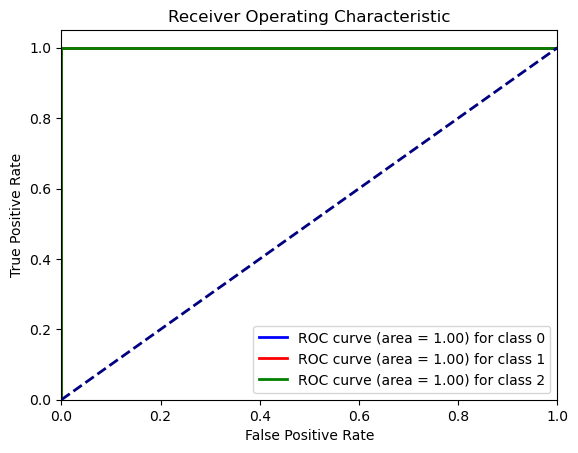

In [279]:
# Binarize the output for the test set
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
colors = ['blue', 'red', 'green']
plt.figure()
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [281]:
# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### cross-validation strategy

In [286]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validation scores
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

# Display the results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Cross-validation scores: [1.         0.96666667 0.86666667 1.         0.93333333]
Mean accuracy: 0.9533333333333334
Standard deviation of accuracy: 0.04988876515698587


# Let's get insights with real data.

In [289]:
df = pd.read_csv("weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## Preprocess the data

In [292]:
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
enco = LabelEncoder()
for i in categorical_columnns:
    df[i] = enco.fit_transform(df[i])
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


As ` Weather Type is the target` so let's split it into `x` and `y`. target and features

In [295]:
x = df.drop("Weather Type", axis = 1)
y = df["Weather Type"]

Now Split the data inti `training` and the `testing` portion

In [298]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model

In [301]:
# Create Model
start = time.time()
model_linear = LogisticRegression(solver='liblinear', max_iter=100000)
model_linear.fit(X_train, y_train)
end = time.time()
time_linear = end - start
print(f"Time Taken by the model: {time_linear}")

Time Taken by the model: 0.25885987281799316


In [303]:
y_pred = model_linear.predict(X_test)

# let's interpret the Confusion matrix

This confusion matrix is for a multi-class classification problem with 4 classes. Here’s how to interpret it:

### Confusion Matrix Layout

The confusion matrix is organized as follows:

- **Rows** represent the actual classes.
- **Columns** represent the predicted classes.

Each entry $((i, j)$) in the matrix represents the number of instances with actual class \(i\) that were predicted as class \(j\).

### Interpretation of the Matrix

- **Diagonal Elements (True Positives for Each Class)**:
  - `504`: Class 0 correctly predicted as Class 0.
  - `525`: Class 1 correctly predicted as Class 1.
  - `656`: Class 2 correctly predicted as Class 2.
  - `503`: Class 3 correctly predicted as Class 3.

- **Off-Diagonal Elements**: These indicate misclassifications:
  - `70`: Class 0 was misclassified as Class 1.
  - `25`: Class 0 was misclassified as Class 2.
  - `52`: Class 0 was misclassified as Class 3.
  - `38`: Class 1 was misclassified as Class 0.
  - `56`: Class 1 was misclassified as Class 2.
  - `28`: Class 1 was misclassified as Class 3.
  - `21`: Class 2 was misclassified as Class 0.
  - `5`: Class 2 was misclassified as Class 1.
  - `19`: Class 2 was misclassified as Class 3.
  - `84`: Class 3 was misclassified as Class 0.
  - `37`: Class 3 was misclassified as Class 1.
  - `17`: Class 3 was misclassified as Class 2.

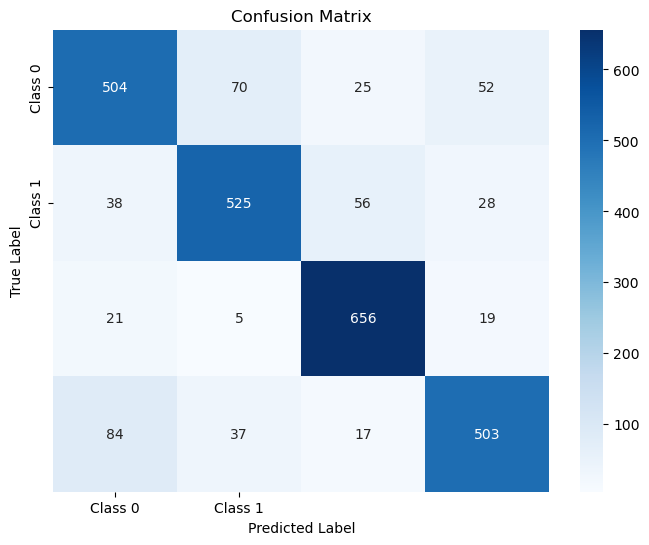

In [307]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- As we discussed previously, that, accuracy shows us that how accurate the model is, how much predict the value accurately, So from here we can say that our model is `82%` accurate but we cann't just rely on it. 

In [310]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy*100)


Accuracy: 82.87878787878788


- Look we have a lesser number now, so this is precision, precision provides insight into the reliability of the model's positive predictions and is especially valuable when dealing with imbalanced datasets.

In [313]:
# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision*100)

Precision: 82.79669131715202


- Look is a bit higher than other, so this is recall,  recall provides insight into the model's ability to find all positive instances and is especially useful in situations where the cost of false negatives is high.

In [316]:
# Recall
precision = recall_score(y_test, y_pred, average='weighted')
print("Precision:", precision*100)

Precision: 82.87878787878788


- Our value vavries, when evaluating the model, we have  to look the the related evaluation parameter not just the accuracy, that's most of the new commers do while evaluating the model, the F1 score offers a balanced view of the model's performance, making it an important metric when both precision and recall are critical.

In [319]:
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1*100)

F1 Score: 82.78516629504719


**Overview:**

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

**Interpretation of the ROC Graph:**

**1. Classes:** The graph displays ROC curves for four different classes (0, 1, 2, and 3).

**2. True Positive Rate (TPR):** The y-axis represents the TPR, which is the proportion of actual positives that are correctly identified as such. A higher TPR indicates better sensitivity of the model.

**3. False Positive Rate (FPR):** The x-axis represents the FPR, which is the proportion of actual negatives that are incorrectly identified as positives. A lower FPR indicates better specificity of the model.

**4. ROC Curves:** Each colored curve represents the ROC curve for a specific class. The closer a curve is to the top-left corner of the plot, the better the model's performance for that class.

**5. Area Under the Curve (AUC):** The AUC is a numerical measure of the overall performance of the model. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC indicates better overall performance.

In [322]:
# Predict probabilities
y_scores = model_linear.predict_proba(X_test)

# Binarize the output
classes = df['Weather Type'].unique()
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

**Observations:**

* **Class 0:** The ROC curve for class 0 is closer to the top-left corner, indicating better performance compared to the other classes. Its AUC of 0.50 is the highest among all classes.
* **Class 1:** The ROC curve for class 1 lies below the curve for class 0, suggesting slightly lower performance. Its AUC of 0.47 is lower than class 0.
* **Class 2 and Class 3:** The ROC curves for classes 2 and 3 are significantly lower than the curves for classes 0 and 1, indicating much poorer performance for these classes. Their AUC values of 0.17 and 0.08, respectively, confirm this.

**Inferences:**

* The model seems to perform better in distinguishing class 0 from other classes compared to its ability to discriminate between classes 1, 2, and 3.
* The performance of the model for classes 2 and 3 is quite poor, as evidenced by their low AUC values and ROC curves closer to the diagonal line.

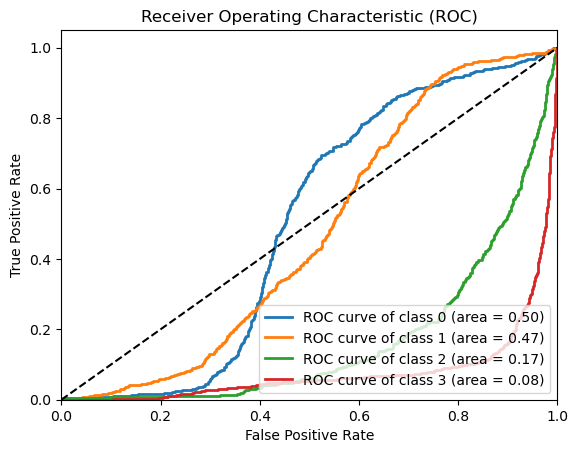

In [325]:
plt.figure()
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

- Classification Report is the collection of other Evaluatiton Metrics, we can get insight at once insteade of getting the score seperately

In [328]:
# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       651
           1       0.82      0.81      0.82       647
           2       0.87      0.94      0.90       701
           3       0.84      0.78      0.81       641

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.83      0.83      0.83      2640



## Cross Validatiton

Cross-validation is a robust technique for evaluating the performance of a machine learning model by dividing the dataset into multiple folds. Each fold acts as a validation set while the remaining folds are used for training. This process helps ensure that the model's performance is not overly dependent on any particular subset of the data.
- If we'll look at the previous accuracy it was about `82`, and now when we use cross validation, we are getting the mean accuracy is `88`, see, the strength of accuracy.

In [332]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validation scores
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

# Display the results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Cross-validation scores: [0.88409091 0.89015152 0.87613636 0.89810606 0.89772727]
Mean accuracy: 0.8892424242424243
Standard deviation of accuracy: 0.008362895224079143


# How Cross Validation works
Cross-validation is a powerful technique for evaluating the performance of a machine learning model. Here's a detailed explanation of how it works:

1. **Split the Dataset**:
   - The dataset is divided into several subsets, called **folds**. The number of folds is usually denoted as \( k \). For example, in 5-fold cross-validation, the dataset is split into 5 folds.

2. **Training and Validation**:
   - For each fold, the model is trained using the \( k-1 \) folds and validated on the remaining fold. This process is repeated \( k \) times, each time with a different fold being used as the validation set and the remaining folds used as the training set.

3. **Compute Performance Metrics**:
   - After training and validating on each fold, performance metrics (such as accuracy, precision, recall, etc.) are computed. These metrics are then aggregated to assess the model's performance across all folds.

4. **Average Performance**:
   - The performance metrics obtained from each fold are averaged to provide a more reliable estimate of the model's performance. This helps ensure that the model's evaluation is not overly dependent on any specific subset of the data.

### Steps in Cross-Validation

1. **Divide the Data**:
   - The dataset is split into \( k \) equal-sized folds.

2. **Iterate Over Folds**:
   - For each fold \( i \) (where \( i \) ranges from 1 to \( k \)):
     - **Train** the model using the \( k-1 \) folds that are not the \( i \)-th fold.
     - **Validate** the model on the \( i \)-th fold.
     - **Record** the performance metric (e.g., accuracy) for this fold.

3. **Aggregate Results**:
   - Calculate the average of the performance metrics across all folds to get a robust estimate of the model's performance.
   - Optionally, compute the standard deviation to understand the variability in performance.

### Example

Consider a dataset with 100 samples and a 5-fold cross-validation strategy:

1. **Split the Dataset**:
   - Divide the 100 samples into 5 folds, each containing 20 samples.

2. **Training and Validation**:
   - **Iteration 1**: Train on folds 2, 3, 4, 5; Validate on fold 1.
   - **Iteration 2**: Train on folds 1, 3, 4, 5; Validate on fold 2.
   - **Iteration 3**: Train on folds 1, 2, 4, 5; Validate on fold 3.
   - **Iteration 4**: Train on folds 1, 2, 3, 5; Validate on fold 4.
   - **Iteration 5**: Train on folds 1, 2, 3, 4; Validate on fold 5.

3. **Compute Performance Metrics**:
   - Calculate accuracy (or other metrics) for each iteration and then average them.

4. **Result**:
   - The final cross-validated accuracy is the average accuracy obtained from each fold, providing a more comprehensive assessment of the model’s performance.

### Why Use Cross-Validation?

- **More Reliable Evaluation**: Provides a better estimate of model performance than a single train-test split.
- **Utilizes Entire Dataset**: Every sample is used for both training and validation, leading to better utilization of data.
- **Reduces Overfitting**: Helps detect models that may perform well on a specific subset of the data but not generalize well to new data.

### Variants of Cross-Validation

- **K-Fold Cross-Validation**: Standard method where the dataset is split into \( k \) folds.
- **Stratified K-Fold Cross-Validation**: Ensures each fold has the same proportion of each class as the original dataset.
- **Leave-One-Out Cross-Validation (LOOCV)**: A special case of k-fold cross-validation where \( k \) is equal to the number of samples. Each fold contains a single sample.
- **Time Series Cross-Validation**: Used for time series data, where the model is trained on past data and validated on future data.

Cross-validation is a versatile and effective technique for evaluating models, helping ensure that the model generalizes well to unseen data.